In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)



export_graphviz(
        tree_clf,
        out_file=os.path.join('.', "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# GINI IMPURITY

This tells that in a group what proportion of samples belongs to same class. gini=0 ie. node is pure

$G_i = 1- \sum_{k=1}^{n}p^2_{i,k}$

where,

    $p_{i,k}$ is the ratio of the class k instances among the training instances in the $i_{th}$ node.
    
    For example:
        
        For IRIS dataset with three classes, in a node there are 50 instances out of 
        which 40 belongs to class 0 and 10 to class 1 and 0 to class 2
        
        then $gini = 1 - (40/50)^2 - (10/50)^2 - (0/50)^2  = 0.32$

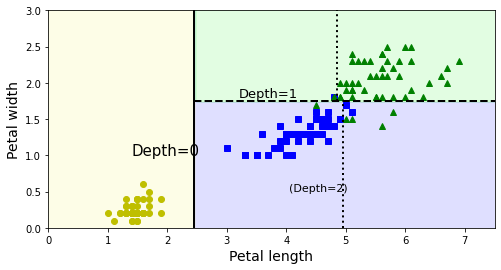

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
        
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Classification And Regression Tree (CART) algorithm

Steps for creating DT is explained using CART:
    
1. Chose the simplest feature k and a threshold value $t_k$ and split the training set into two.
2. Calculate the cost function. The value of k and $t_k$ should minimize this cost function.

$J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$
                                               
where, $G_{left-right}$ = Gini Impurity of the left or right subset.
        
$m_{left-right}$ = number of instances in the left or right subset

3. The splitting of the dataset stop when the impurity cannot be reduced further.
4. Once the training set is split into two it splits the subsets suing the same logic.

# Complexity

1. For prediction each node just compare the values of the instances with **one feature** so complexity is just
$O(log_2(m))$.
2. Traning Complexity $(n \times m log(m))$.

# ENTROPY and GINI

1. Impurity can be calculated by finding the entropy of in a node.
2. Entropy is zero when all the samples in a node are of same class. Theoritically its same as GINI.
3. Formula:

    <img src='entropy.png'>
    
    E.g. - 49/54 log2(49/54) - 5/54 log2(5/54) = 0.445
    
GINI VS ENTROPY

1. GINI is faster but doesnt use the classes that are frequent. Not a problem with entropy i.e the tree is more balanced.


# Regularization Hyperparameters

1. Unlike Linear models(data is linear), DT make no assumption about the data.
2. Non-Parameteric Models, where number of features to use are not determined so the DT will adapt closely 
   to the training data ---> OVERFITTING.
3. Parameteric Models, like linear models, number of features to be considered are predetermined. --> UNDERFIT

**REGULARIZATION**

Use parameters like: max_depth, min_samples_split (the minimum number of samples a node must have before it can be split), min_samples_leaf (the minimum num‐
ber of samples a leaf node must have), min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted
max_leaf_nodes (maximum number of leaf nodes), and max_features (maximum number of features that are evaluated for splitting at each node). Increas‐
ing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.

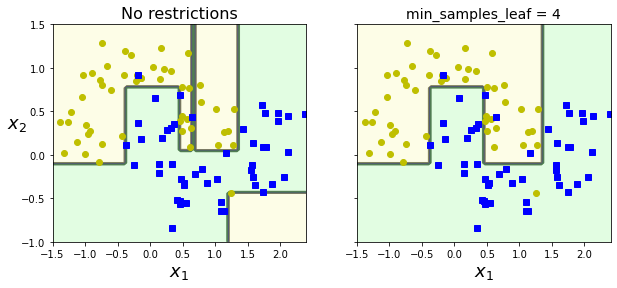

In [18]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0]) # where to plot the fig
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
# plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

# save_fig("min_samples_leaf_plot")
plt.show()